# Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import svm

import optuna
import sklearn
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Load and visualize the data

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
challenge_data = pd.read_csv('test.csv')
challenge_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory data analysis Train data

Percentage of survival: 38.38% of all passengers


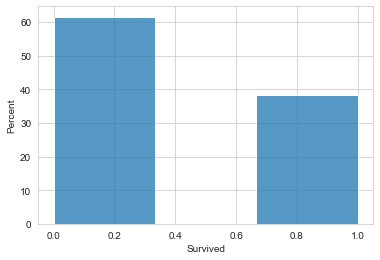

In [4]:
sns.histplot(data=train_data, x="Survived", stat="percent", bins=3, multiple="stack")
survived = train_data.Survived.value_counts()[1]
print(f'Percentage of survival: {(survived/train_data.shape[0])*100:.2f}% of all passengers')

In [5]:
print(train_data.columns)
print(train_data.shape)
print(train_data.dtypes)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
for i in train_data.columns:
    print(i)
    print(train_data[i].unique())

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [7]:
for i in challenge_data.columns:
    print(i)
    print(challenge_data[i].unique())

PassengerId
[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086

# Check for nan values

There is nan values in the columns

In [8]:
for i in train_data.columns:
    print(f"Null values in {i}: ", train_data[i].isna().sum())

Null values in PassengerId:  0
Null values in Survived:  0
Null values in Pclass:  0
Null values in Name:  0
Null values in Sex:  0
Null values in Age:  177
Null values in SibSp:  0
Null values in Parch:  0
Null values in Ticket:  0
Null values in Fare:  0
Null values in Cabin:  687
Null values in Embarked:  2


In [9]:
for i in challenge_data.columns:
    print(f"Null values in {i}: ", challenge_data[i].isna().sum())

Null values in PassengerId:  0
Null values in Pclass:  0
Null values in Name:  0
Null values in Sex:  0
Null values in Age:  86
Null values in SibSp:  0
Null values in Parch:  0
Null values in Ticket:  0
Null values in Fare:  1
Null values in Cabin:  327
Null values in Embarked:  0


First to deal with the nan in the column Embarked.

In [10]:
df = train_data[train_data['Embarked'].isnull()]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


There is only two passengers with nan in the column Embarked in the train data. Both are from the first class. Both Female, both were on the same cabin. No siblings or spouses, parents or children on board.

In [11]:
df2 = train_data[train_data['first_class'] == 1]
df21 = df2[df2['Embarked'] == 'Q']
print(df21.describe())
df22 = df2[df2['Embarked'] == 'C']
print(df22.describe())
df23 = df2[df2['Embarked'] == 'S']
print(df23.describe())

KeyError: 'first_class'

In [ ]:
train_data[train_data['Cabin'] == 'B28'].head()

Looking at the Fare the best guess that we could have is to think that they embarked in Cherbourg.

# Prepare Dataframe to training

In [12]:
x_train = train_data.drop("Survived", axis=1)
y_train = train_data['Survived'].to_numpy()

In [13]:
def prepare_df(dataframe):
    one_hot_pipeline = Pipeline([('fill nan', SimpleImputer(strategy="most_frequent")),
                                 ('one_hot_encoding', OneHotEncoder(sparse=False))])
    cat_features = one_hot_pipeline.fit_transform(dataframe[['Sex', 'Embarked', 'Pclass']])

    num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median"))])
    #,("Normalizer", Normalizer(norm='l2'))
    num_features = num_pipeline.fit_transform(dataframe[['Age', 'SibSp', 'Parch', 'Fare']])

    all = np.concatenate((num_features, cat_features), axis=1)

    print(all)

    prepared_df = pd.DataFrame(all, columns=['Age', 'SibSp', 'Parch', 'Fare', 'Male', 'Female', 'S', 'C', 'Q', 'First_class', 'Second_class', 'Third_class'])
    return prepared_df

train_data_prepared = prepare_df(train_data)
train_data_prepared.head()

[[22.  1.  0. ...  0.  0.  1.]
 [38.  1.  0. ...  1.  0.  0.]
 [26.  0.  0. ...  0.  0.  1.]
 ...
 [28.  1.  2. ...  0.  0.  1.]
 [26.  0.  0. ...  1.  0.  0.]
 [32.  0.  0. ...  0.  0.  1.]]


,Age,SibSp,Parch,Fare,Male,Female,S,C,Q,First_class,Second_class,Third_class
0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [14]:
def objective(trial):
    max_depth = trial.suggest_int("max_depth", 1, 9)
    n_estimators = trial.suggest_int("rf_num_estimators", 2, 100, log=True)
    eta = trial.suggest_loguniform("eta", 1e-8, 1.0)
    gamma = trial.suggest_loguniform("gamma", 1e-8, 1.0)
    grow_policy = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    rf_model = XGBClassifier(use_label_encoder=False,
                             eval_metric='mlogloss',
                             gamma= gamma,
                             eta = eta,
                             grow_policy = grow_policy,
                             max_depth = max_depth,
                             n_estimators = n_estimators,
                             random_state = 42)

    return sklearn.model_selection.cross_val_score(rf_model,
                                                   train_data_prepared.to_numpy(),
                                                   y_train,
                                                   n_jobs=-1,
                                                   cv=5).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-07-12 00:18:02,633] A new study created in memory with name: no-name-19ecc926-2d33-45f8-b2a3-986a6be4986c
[I 2022-07-12 00:18:03,559] Trial 0 finished with value: 0.8283346933651371 and parameters: {'max_depth': 8, 'rf_num_estimators': 4, 'eta': 4.30530092610876e-05, 'gamma': 1.6129449505920325e-06, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.8283346933651371.
[I 2022-07-12 00:18:03,852] Trial 1 finished with value: 0.8114556525014123 and parameters: {'max_depth': 5, 'rf_num_estimators': 46, 'eta': 8.489617883111366e-07, 'gamma': 1.9975335221675916e-06, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.8283346933651371.
[I 2022-07-12 00:18:04,108] Trial 2 finished with value: 0.8114556525014123 and parameters: {'max_depth': 4, 'rf_num_estimators': 5, 'eta': 0.0009119041414787477, 'gamma': 0.12220544134326174, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.8283346933651371.
[I 2022-07-12 00:18:04,139] Trial 3 finished with value: 0.81145565250

Accuracy: 0.8451384093904967
Best hyperparameters: {'max_depth': 9, 'rf_num_estimators': 60, 'eta': 0.0612182944679247, 'gamma': 0.6971698628867101, 'grow_policy': 'depthwise'}


In [15]:
def objective2(trial):
    max_depth = trial.suggest_int("max_depth", 1, 9)
    n_estimators = trial.suggest_int("rf_num_estimators", 2, 100, log=True)

    rf_model = RandomForestClassifier(max_depth = max_depth,
                             n_estimators = n_estimators,
                             random_state = 42)

    return sklearn.model_selection.cross_val_score(rf_model,
                                                   train_data_prepared.to_numpy(),
                                                   y_train,
                                                   n_jobs=-1,
                                                   cv=5).mean()

study2 = optuna.create_study(direction='maximize')
study2.optimize(objective2, n_trials=1000)

trial2 = study2.best_trial
print('Accuracy: {}'.format(trial2.value))
print("Best hyperparameters: {}".format(trial2.params))

[I 2022-07-12 00:20:11,839] A new study created in memory with name: no-name-5f926188-8c71-49dc-93ee-bcf18356f9ac
[I 2022-07-12 00:20:11,895] Trial 0 finished with value: 0.8013746783001695 and parameters: {'max_depth': 8, 'rf_num_estimators': 6}. Best is trial 0 with value: 0.8013746783001695.
[I 2022-07-12 00:20:11,950] Trial 1 finished with value: 0.8294331805913 and parameters: {'max_depth': 8, 'rf_num_estimators': 40}. Best is trial 1 with value: 0.8294331805913.
[I 2022-07-12 00:20:11,982] Trial 2 finished with value: 0.8181909484652564 and parameters: {'max_depth': 5, 'rf_num_estimators': 30}. Best is trial 1 with value: 0.8294331805913.
[I 2022-07-12 00:20:11,994] Trial 3 finished with value: 0.8047266336074321 and parameters: {'max_depth': 5, 'rf_num_estimators': 6}. Best is trial 1 with value: 0.8294331805913.
[I 2022-07-12 00:20:12,058] Trial 4 finished with value: 0.8193208210407382 and parameters: {'max_depth': 7, 'rf_num_estimators': 41}. Best is trial 1 with value: 0.829

Accuracy: 0.8350574351892537
Best hyperparameters: {'max_depth': 8, 'rf_num_estimators': 98}


In [16]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(train_data_prepared.to_numpy(), y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.612 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.598 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
xgboost = XGBClassifier(use_label_encoder=False,
                         eval_metric='mlogloss',
                         gamma= trial.params['gamma'],
                         eta = trial.params['eta'],
                         grow_policy = trial.params['grow_policy'],
                         max_depth = trial.params['max_depth'],
                         n_estimators = trial.params['rf_num_estimators'])

xgboost.fit(train_data_prepared.to_numpy(), y_train)

In [ ]:
random_forest = RandomForestClassifier(max_depth = trial2.params['max_depth'],
                                  n_estimators = trial2.params['rf_num_estimators'],
                                  random_state = 42)

random_forest.fit(train_data_prepared.to_numpy(), y_train)

In [17]:
# make a prediction with a hard voting ensemble
from sklearn.ensemble import VotingClassifier

# define the base models
models = list()
models.append(('xgboost', XGBClassifier(use_label_encoder=False,eval_metric='mlogloss',
                                        gamma= trial.params['gamma'],
                                        eta = trial.params['eta'],
                                        grow_policy = trial.params['grow_policy'],
                                        max_depth = trial.params['max_depth'],
                                        n_estimators = trial.params['rf_num_estimators'])))
models.append(('random', RandomForestClassifier(max_depth = trial2.params['max_depth'],
                                              n_estimators = trial2.params['rf_num_estimators'],
                                              random_state = 42)))
models.append(('SVM', svm.SVC(C=1000, gamma=0.0001, kernel='rbf')))

# define the hard voting ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')
# fit the model on all available data
ensemble.fit(train_data_prepared.to_numpy(), y_train)

VotingClassifier(estimators=[('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eta=0.0612182944679247,
                                            eval_metric='mlogloss',
                                            gamma=0.6971698628867101,
                                            gpu_id=None,
                                            grow_policy='depthwise',
                                            importance_type=None,
                                            inter...
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=9,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=60, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, ...)),
                             ('random',
                              RandomForestClassifier(max_depth=8,
                                                     n_estimators=98,
                                                     random_state=42)),
                             ('SVM', SVC(C=1000, gamma=0.0001))])

In [18]:
challenge_data_prepared = prepare_df(challenge_data)
challenge_data_prepared.head()

[[34.5  0.   0.  ...  0.   0.   1. ]
 [47.   1.   0.  ...  0.   0.   1. ]
 [62.   0.   0.  ...  0.   1.   0. ]
 ...
 [38.5  0.   0.  ...  0.   0.   1. ]
 [27.   0.   0.  ...  0.   0.   1. ]
 [27.   1.   1.  ...  0.   0.   1. ]]


,Age,SibSp,Parch,Fare,Male,Female,S,C,Q,First_class,Second_class,Third_class
0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,27.0,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,22.0,1.0,1.0,12.2875,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [19]:
#pred = xgboost.predict(challenge_data_prepared)
pred = ensemble.predict(challenge_data_prepared)
passid = challenge_data['PassengerId'].to_numpy()
final = np.vstack((passid, pred)).T

final_df = pd.DataFrame(final, columns=['PassengerId', 'Survived'])
final_df.head()

/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [20]:
final_df.to_csv('file_name.csv', index=False)